In [1]:
from sqlalchemy import create_engine
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler
import squarify  # treemap 
import warnings 
warnings.filterwarnings("ignore")


In [2]:
path= "customery_booking.txt"

data= pd.read_csv(path) 
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df=data
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.shape

(50000, 14)

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
df.value_counts()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  flight_hour  flight_day  route   booking_origin  wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  flight_duration  booking_complete
3               Mobile         RoundTrip  37             18              4            Tue         HNDTRZ  Japan           1                    0                     0                      7.57             0                   11
1               Mobile         RoundTrip  199            6               18           Mon         IKASZX  China           0                    0                     0                      8.15             0                    9
2               Mobile         RoundTrip  29             6               6            Thu         DPSPVG  China           1                    1                     1                      5.33             0                    8
1               Mobile         RoundTrip  98             36              13           Mon     

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [9]:
cat_cols = [col for col in df.columns if df[col].dtypes =="O"]
cat_but_car = [col for col in df.columns if df[col].nunique() > 100 and df[col].dtypes == "O"]
cat_cols = [col for col in cat_cols if col not in cat_but_car]
cat_cols

['sales_channel', 'trip_type', 'flight_day']

In [10]:

# Categoric Columns
df[cat_cols].head()

# cat but car
df[cat_but_car].head()

,route,booking_origin
0,AKLDEL,New Zealand
1,AKLDEL,New Zealand
2,AKLDEL,India
3,AKLDEL,New Zealand
4,AKLDEL,India


In [11]:


# Categoric Columns
df[cat_cols]

# cat but car
df[cat_but_car]

,route,booking_origin
0,AKLDEL,New Zealand
1,AKLDEL,New Zealand
2,AKLDEL,India
3,AKLDEL,New Zealand
4,AKLDEL,India
...,...,...
49995,PERPNH,Australia
49996,PERPNH,Australia
49997,PERPNH,Australia
49998,PERPNH,Australia


In [12]:
def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    print("###################################")
    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.show()

               sales_channel   Ratio
sales_channel                       
Internet               44382  88.764
Mobile                  5618  11.236
###################################


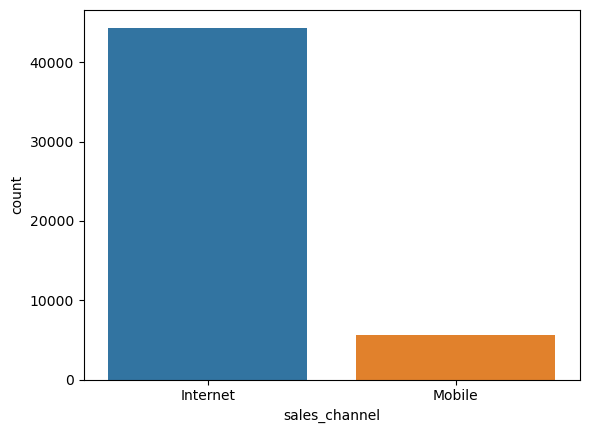

            trip_type   Ratio
trip_type                    
RoundTrip       49497  98.994
OneWay            387   0.774
CircleTrip        116   0.232
###################################


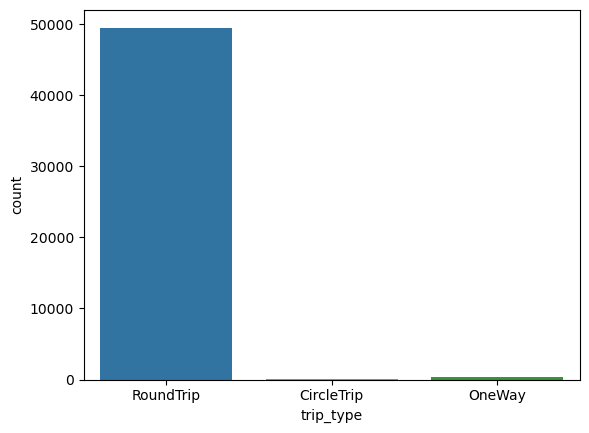

            flight_day   Ratio
flight_day                    
Mon               8102  16.204
Wed               7674  15.348
Tue               7673  15.346
Thu               7424  14.848
Fri               6761  13.522
Sun               6554  13.108
Sat               5812  11.624
###################################


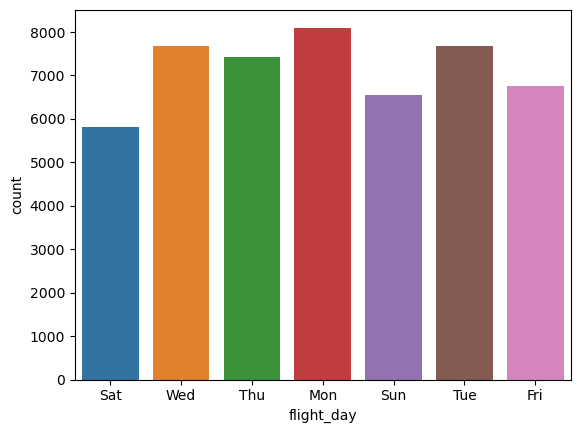

In [13]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [14]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.show()

               sales_channel   Ratio
sales_channel                       
Internet               44382  88.764
Mobile                  5618  11.236
##########################################


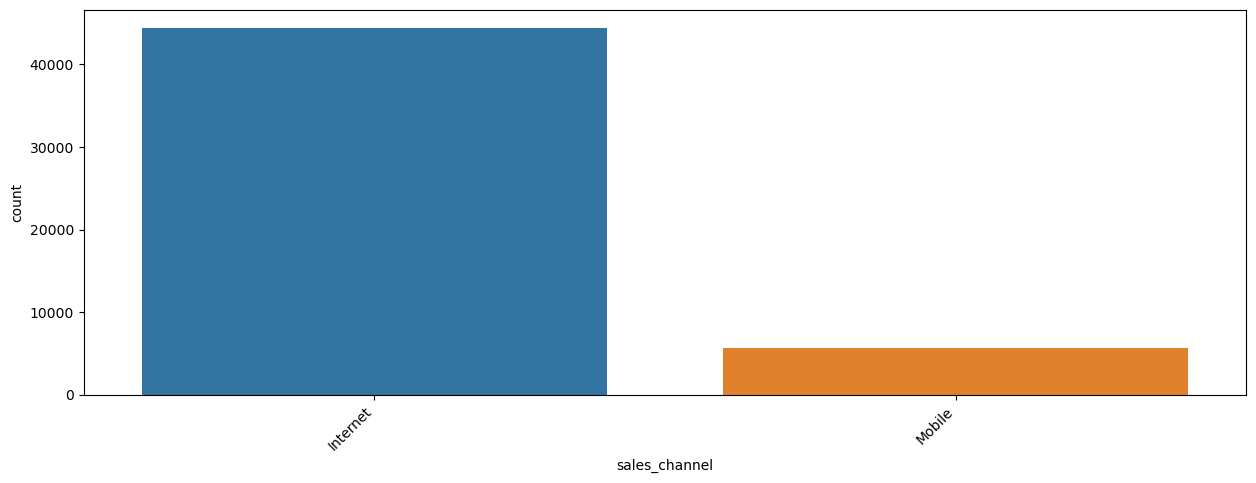

In [15]:
cat_summary(df, "sales_channel", plot=True)

            trip_type   Ratio
trip_type                    
RoundTrip       49497  98.994
OneWay            387   0.774
CircleTrip        116   0.232
##########################################


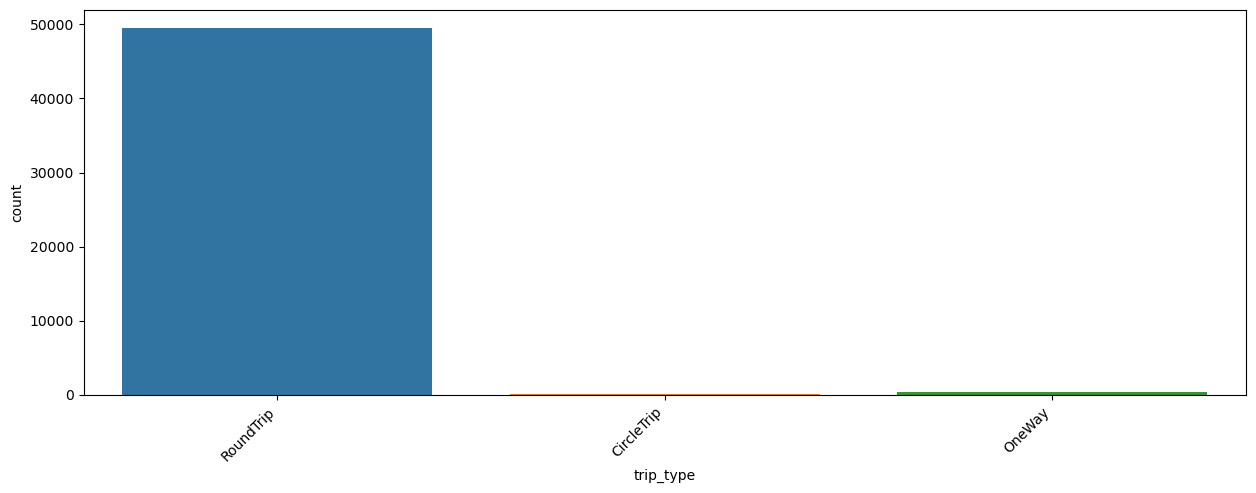

In [16]:
cat_summary(df, "trip_type", plot=True)

            flight_day   Ratio
flight_day                    
Mon               8102  16.204
Wed               7674  15.348
Tue               7673  15.346
Thu               7424  14.848
Fri               6761  13.522
Sun               6554  13.108
Sat               5812  11.624
##########################################


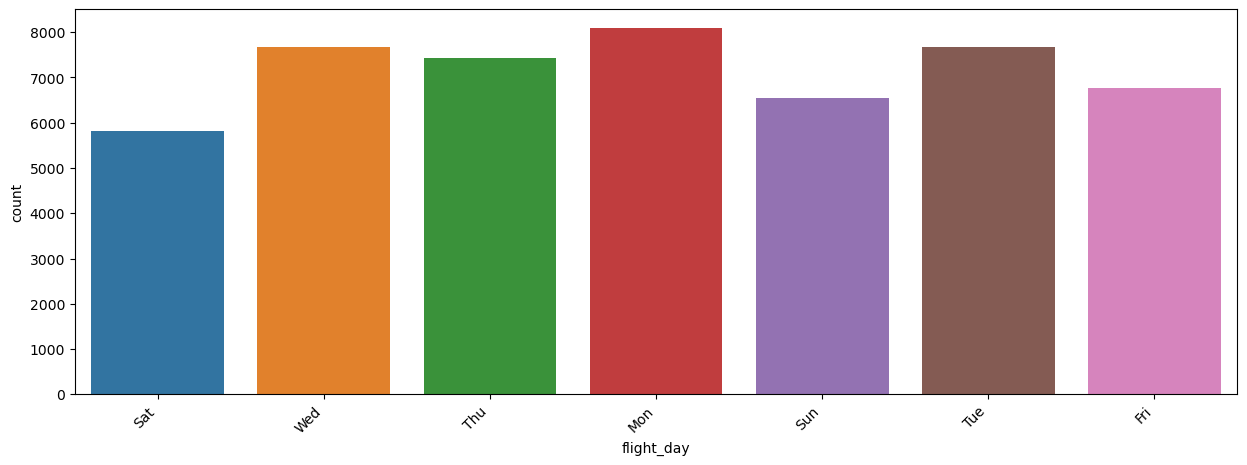

In [17]:
cat_summary(df, "flight_day", plot=True)

In [18]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
num_cols = [col for col in num_cols]
num_cols

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

count    50000.000000
mean         1.591240
std          1.020165
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          2.000000
80%          2.000000
90%          3.000000
95%          4.000000
99%          6.000000
max          9.000000
Name: num_passengers, dtype: float64


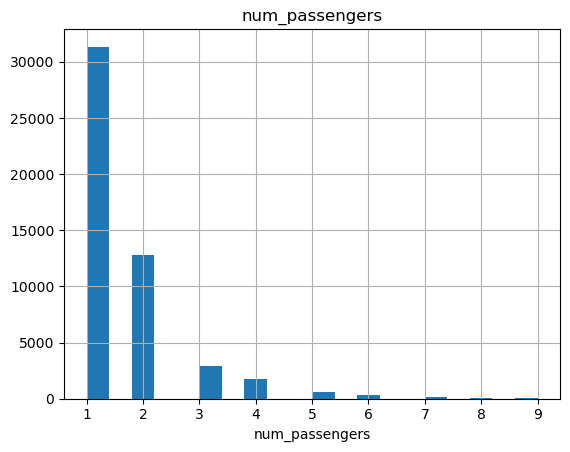

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
5%           4.000000
10%          8.000000
20%         17.000000
30%         26.000000
40%         38.000000
50%         51.000000
60%         70.000000
70%         96.000000
80%        141.000000
90%        224.000000
95%        287.000000
99%        390.000000
max        867.000000
Name: purchase_lead, dtype: float64


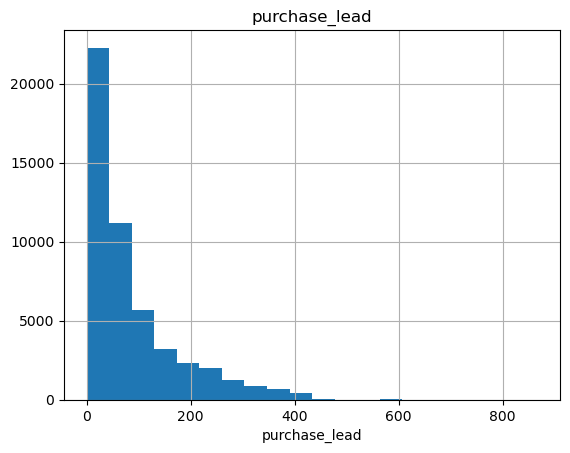

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
5%           3.00000
10%          4.00000
20%          5.00000
30%          5.00000
40%          6.00000
50%         17.00000
60%         20.00000
70%         25.00000
80%         31.00000
90%         53.00000
95%         84.00000
99%        168.00000
max        778.00000
Name: length_of_stay, dtype: float64


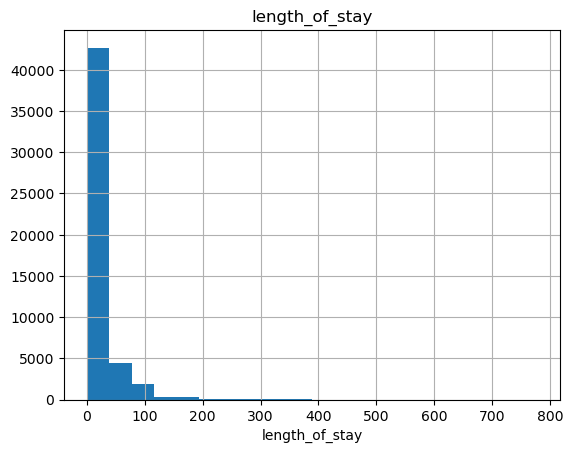

count    50000.00000
mean         9.06634
std          5.41266
min          0.00000
5%           1.00000
10%          2.00000
20%          4.00000
30%          6.00000
40%          7.00000
50%          9.00000
60%         10.00000
70%         12.00000
80%         14.00000
90%         16.00000
95%         19.00000
99%         23.00000
max         23.00000
Name: flight_hour, dtype: float64


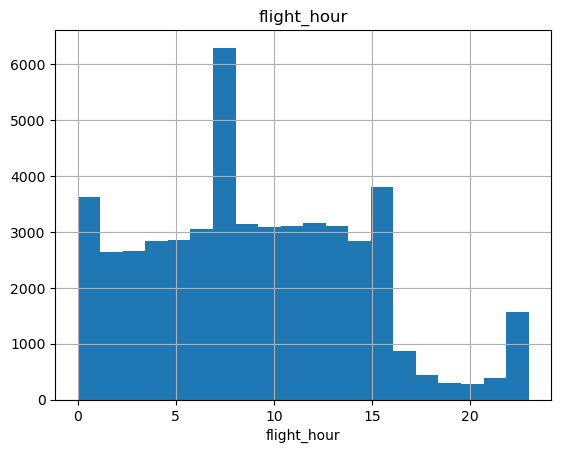

count    50000.000000
mean         0.668780
std          0.470657
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: wants_extra_baggage, dtype: float64


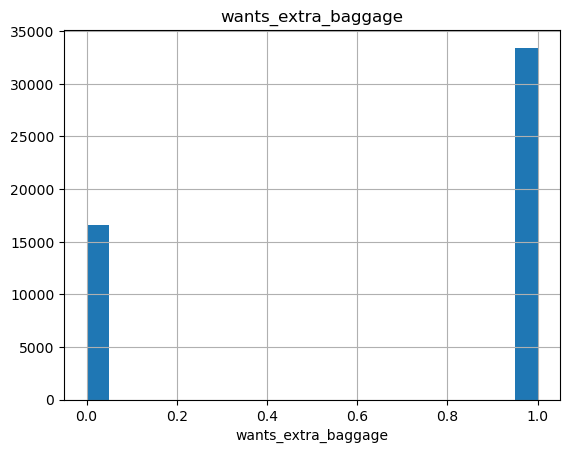

count    50000.000000
mean         0.296960
std          0.456923
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: wants_preferred_seat, dtype: float64


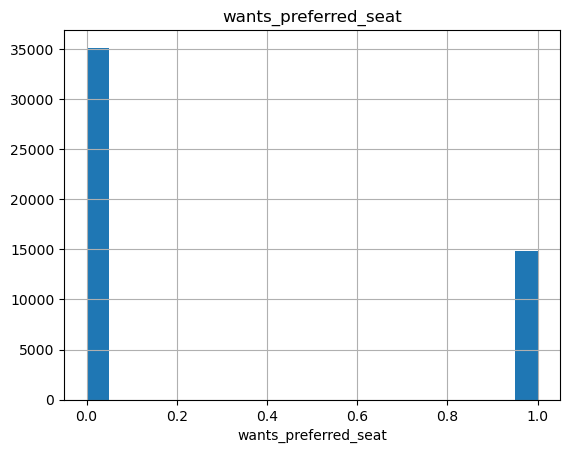

count    50000.000000
mean         0.427140
std          0.494668
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: wants_in_flight_meals, dtype: float64


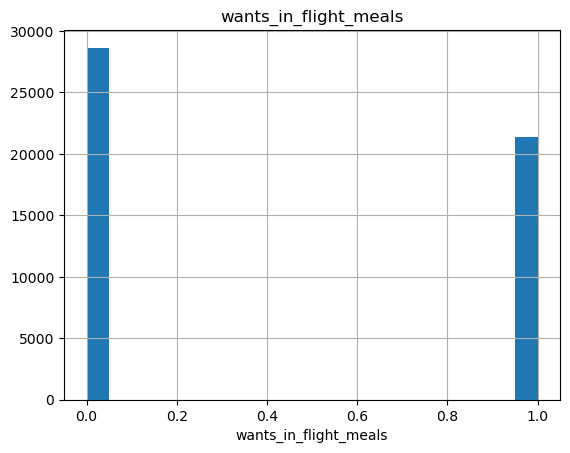

count    50000.000000
mean         7.277561
std          1.496863
min          4.670000
5%           4.670000
10%          5.070000
20%          5.620000
30%          6.420000
40%          6.620000
50%          7.570000
60%          8.580000
70%          8.670000
80%          8.830000
90%          8.830000
95%          8.830000
99%          8.830000
max          9.500000
Name: flight_duration, dtype: float64


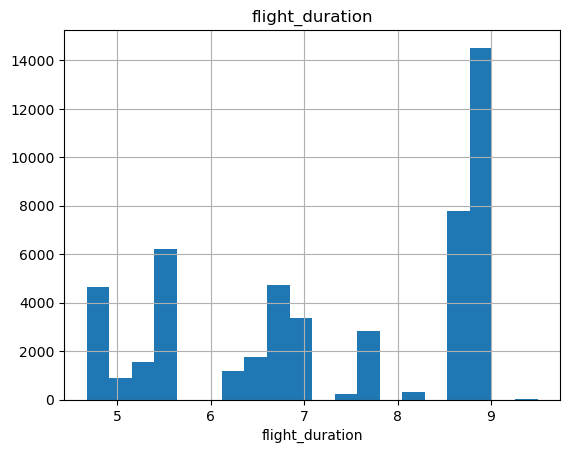

count    50000.000000
mean         0.149560
std          0.356643
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: booking_complete, dtype: float64


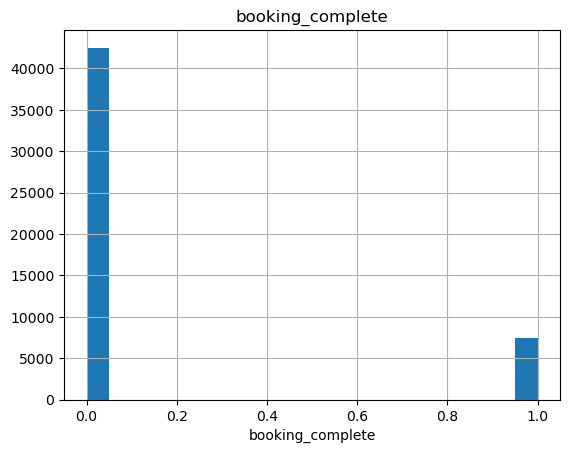

In [19]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [20]:
df["purchase_lead"].nunique()

470

In [21]:
df_product = df.groupby("sales_channel").agg({"num_passengers":"count"})
df_product.reset_index(inplace=True)
df_product

,sales_channel,num_passengers
0,Internet,44382
1,Mobile,5618


In [22]:
df_product = df.groupby("trip_type").agg({"num_passengers":"count"})
df_product.reset_index(inplace=True)
df_product

,trip_type,num_passengers
0,CircleTrip,116
1,OneWay,387
2,RoundTrip,49497


In [23]:
df_product = df.groupby("flight_day").agg({"num_passengers":"count"})
df_product.reset_index(inplace=True)
df_product

,flight_day,num_passengers
0,Fri,6761
1,Mon,8102
2,Sat,5812
3,Sun,6554
4,Thu,7424
5,Tue,7673
6,Wed,7674


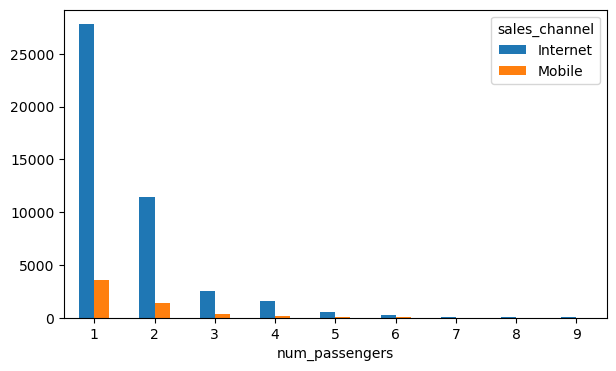

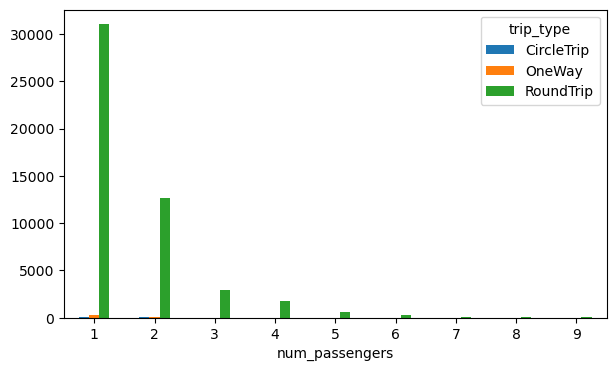

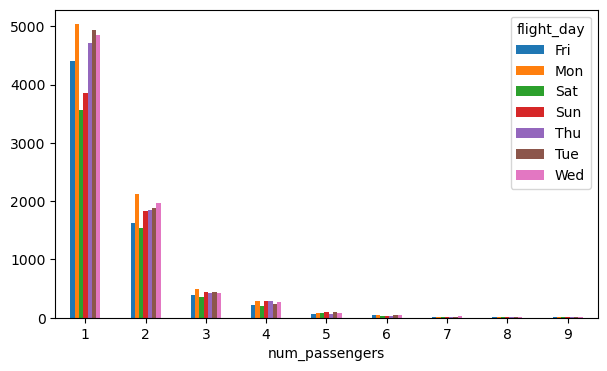

In [24]:
for col in cat_cols:
    graph=pd.crosstab(index=df['num_passengers'],columns=df[col]).plot.bar(figsize=(7,4), rot=0)
    plt.show()

In [25]:
def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [26]:
for col in num_cols:
    target_summary_with_num(df, "num_passengers", col)

                num_passengers
num_passengers                
1                          1.0
2                          2.0
3                          3.0
4                          4.0
5                          5.0
6                          6.0
7                          7.0
8                          8.0
9                          9.0


                purchase_lead
num_passengers               
1                   68.787797
2                  105.661903
3                  117.935736
4                  136.809978
5                  138.008913
6                  129.332180
7                  119.464912
8                  117.337079
9                  116.878788


                length_of_stay
num_passengers                
1                    26.054542
2                    19.555373
3                    15.901054
4                    14.293722
5                    12.818182
6                    10.740484
7                     9.228070
8                    10.719101
9              

In [27]:
def outlier_thresholds(df, col_name, q1=0.10, q3=0.90):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [28]:
def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [29]:
for col in num_cols:
    print(col, ": ", check_outlier(df, col))

num_passengers :  True
purchase_lead :  True
length_of_stay :  True
flight_hour :  False
wants_extra_baggage :  False
wants_preferred_seat :  False
wants_in_flight_meals :  False
flight_duration :  False
booking_complete :  False


#with this output, one can note that there are outliers in the numerical variables. This indicates error or poor methods of sample gathering or something of interest to analyze.

In [30]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [31]:
def missing_values_table(df, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [32]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


We determine that there are no missing values

In [33]:
import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
import xgboost as xgb

NameError: name 'corr' is not defined

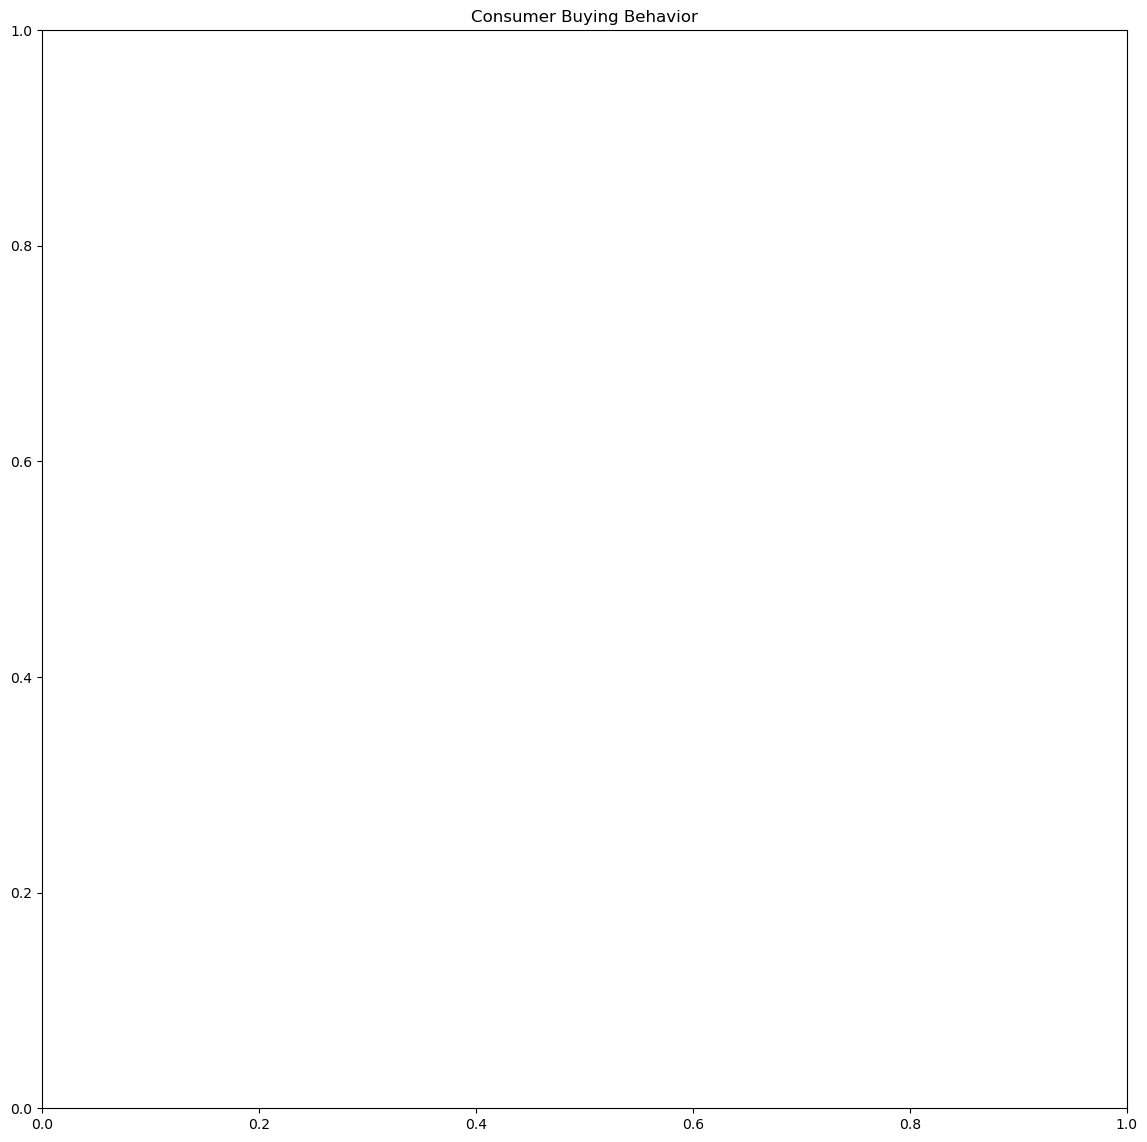

In [59]:
plt.figure(figsize = (14,14))
plt.title('Consumer Buying Behavior')
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()